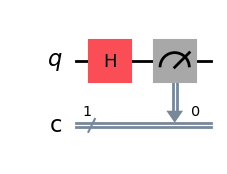

In [16]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

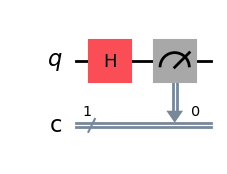

In [17]:
# Création d'un circuit quantique avec un qubit
qc = QuantumCircuit(1, 1)

# Appliquer une porte de Hadamard pour créer un superposition
qc.h(0)

# Mesurer le qubit
qc.measure(0, 0)

qc.draw("mpl")

In [18]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Compiler le circuit pour le qasm
estimator = Estimator(mode=backend)
compiled_circuit = transpile(qc, backend)

In [19]:
# Exécuter le circuit sur le backend
job = assemble(compiled_circuit)
result = estimator.run(job).result()

C:\Users\jacqu\AppData\Local\Temp\ipykernel_18972\288752595.py:2: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  job = assemble(compiled_circuit)


TypeError: 'QasmQobj' object is not iterable

In [ ]:
# Afficher les résultats
counts = result.get_counts()
plot_histogram(counts)
plt.show()